# Task 3

## Setting up the notebook

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
import random
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.metrics import plot_confusion_matrix, classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,RidgeCV, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, cross_validate

%matplotlib inline
sns.set_theme()

import warnings
warnings.filterwarnings("ignore")

## 1. Data Preparation

### 1.1 Loading the Data
Load the train data set

In [2]:
df1 = pd.read_csv('data/train.csv')
df2 = pd.read_csv('data/test.csv')
df3 = pd.read_csv('data/example-submission.csv')

In [3]:
df1.shape

(16784, 30)

In [4]:
df2['price']= df3['Predicted']
df2.shape

(5000, 30)

In [5]:
df = pd.concat([df1,df2],axis=0)

In [6]:
df.shape

(21784, 30)

In [7]:
num_points, num_attributes = df.shape
print("There are {} data points, each with {} attributes.". format(num_points, num_attributes))

There are 21784 data points, each with 30 attributes.


In [8]:
df.dtypes 

listing_id             int64
title                 object
make                  object
model                 object
description           object
manufactured         float64
original_reg_date     object
reg_date              object
type_of_vehicle       object
category              object
transmission          object
curb_weight          float64
power                float64
fuel_type             object
engine_cap           float64
no_of_owners         float64
depreciation         float64
coe                  float64
road_tax             float64
dereg_value          float64
mileage              float64
omv                  float64
arf                  float64
opc_scheme            object
lifespan              object
eco_category          object
features              object
accessories           object
indicative_price     float64
price                float64
dtype: object

In [9]:
col_cat = df.dtypes[df.dtypes=='object'].index
col_num = df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index

In [10]:
# to display all the categorical columns
col_cat 

Index(['title', 'make', 'model', 'description', 'original_reg_date',
       'reg_date', 'type_of_vehicle', 'category', 'transmission', 'fuel_type',
       'opc_scheme', 'lifespan', 'eco_category', 'features', 'accessories'],
      dtype='object')

In [11]:
# to display all the numerical columns
col_num 

Index(['listing_id', 'manufactured', 'curb_weight', 'power', 'engine_cap',
       'no_of_owners', 'depreciation', 'coe', 'road_tax', 'dereg_value',
       'mileage', 'omv', 'arf', 'indicative_price', 'price'],
      dtype='object')

In [12]:
# to summarize the numerical data
df.describe()

,listing_id,manufactured,curb_weight,power,engine_cap,no_of_owners,depreciation,coe,road_tax,dereg_value,mileage,omv,arf,indicative_price,price
count,2.178400e+04,21529.000000,21049.000000,18772.000000,21716.000000,21552.000000,21219.000000,20648.000000,18996.000000,20260.000000,16916.000000,2.173100e+04,2.141300e+04,0.0,2.178400e+04
mean,1.009853e+06,2014.184820,1553.647537,133.787104,2083.376543,2.034289,14476.133183,41384.488038,1354.396294,44138.952270,72712.078801,3.875845e+04,3.844564e+04,NaN,1.121255e+05
std,2.573981e+04,8.116601,806.180899,73.994166,1126.884124,1.360118,19476.448225,16550.446394,1175.650892,42828.273169,50936.032499,4.383873e+04,5.959812e+04,NaN,1.347167e+05
min,3.652410e+05,1933.000000,2.000000,38.000000,0.000000,1.000000,2680.000000,10.000000,50.000000,97.000000,1.000000,8.880000e+02,4.400000e+01,NaN,2.100000e+03
25%,1.002398e+06,2011.000000,1280.000000,90.000000,1498.000000,1.000000,8640.000000,31335.000000,684.000000,24927.500000,33000.000000,1.917800e+04,1.263100e+04,NaN,5.480000e+04
50%,1.017470e+06,2016.000000,1440.000000,110.000000,1797.000000,2.000000,10610.000000,40690.000000,976.000000,35620.000000,66000.000000,2.708400e+04,2.174700e+04,NaN,7.900000e+04
75%,1.025188e+06,2018.000000,1680.000000,147.000000,2356.000000,3.000000,14835.000000,51600.000000,1369.000000,50312.500000,104739.250000,4.044050e+04,4.247600e+04,NaN,1.209000e+05
max,1.031325e+06,2925.000000,20980.000000,735.000000,15681.000000,6.000000,865610.000000,97889.000000,12375.000000,786967.000000,740459.000000,1.150000e+06,1.083350e+06,NaN,2.920500e+06


## 2. Exploratory data analysis

### 2.1 Missing Values

First to find all rows that have at least 1 NA value in any column.
- Finding: all the rows contains at least 1 empty entry

In [13]:
row_has_na = df.isna().any(axis=1)

df_na = df[row_has_na]

print("There are {} data points that have at least 1 missing value (NA)".format(df_na.shape[0]))

There are 21784 data points that have at least 1 missing value (NA)


### 2.2 Check for Collinearity

- Drop the `indicative_price` column as it has all NA rows
- Filter the numerical features

In [14]:
col_num =df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index 
col_num = list(col_num)
col_num.remove('indicative_price')
len(col_num)

14

In [15]:
col_num

['listing_id',
 'manufactured',
 'curb_weight',
 'power',
 'engine_cap',
 'no_of_owners',
 'depreciation',
 'coe',
 'road_tax',
 'dereg_value',
 'mileage',
 'omv',
 'arf',
 'price']

#### 2.2.1 Plot the distribution of all the numeric features


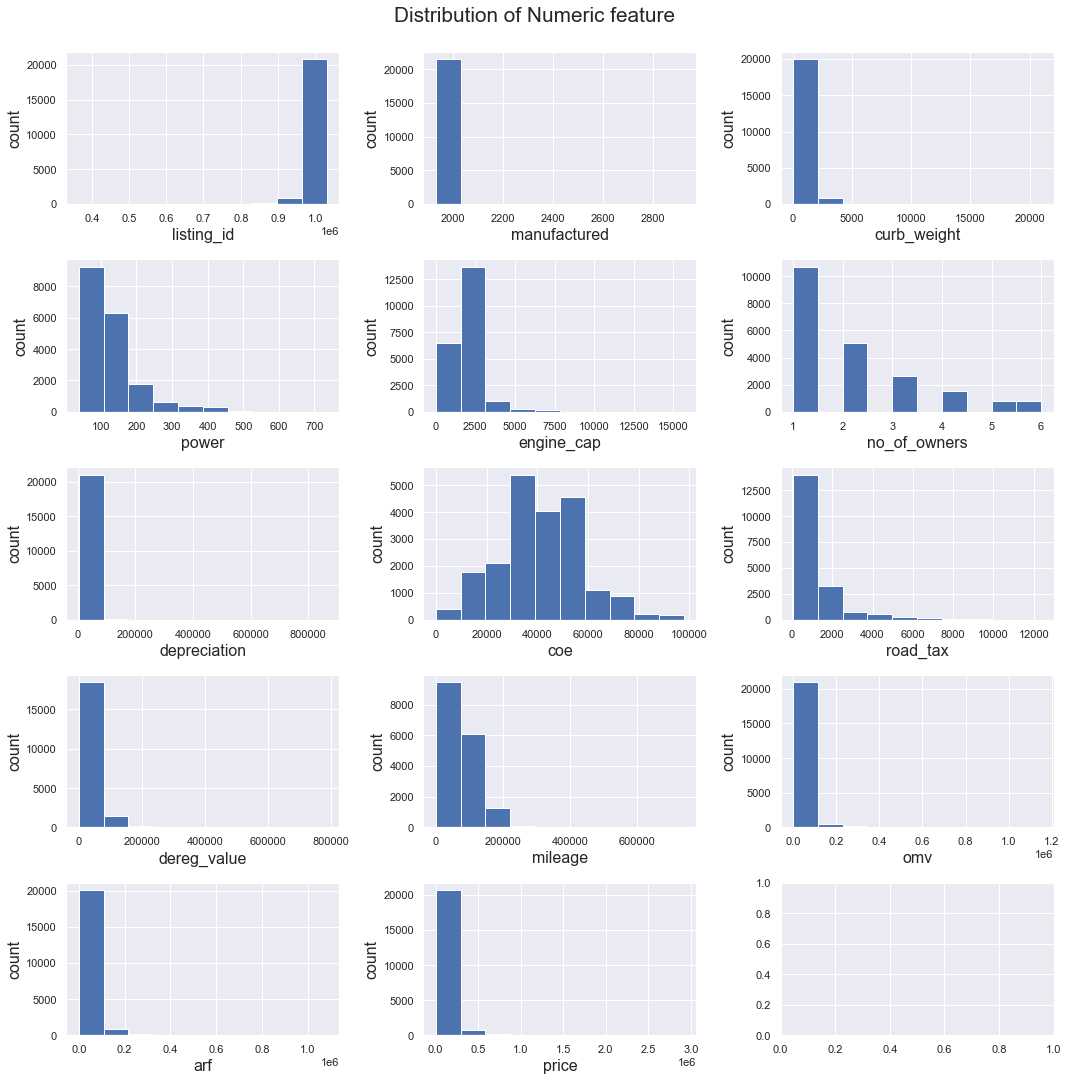

In [16]:
fig, axs = plt.subplots(5, 3, figsize=(15,15))
rowPosn = 0
colPosn = 0

def addPosn():
    global colPosn
    colPosn+=1
    if colPosn > 2:
        colPosn = 0
        global rowPosn
        rowPosn+=1
    
for col in col_num:
    axs[rowPosn,colPosn].hist(df[col])
    axs[rowPosn,colPosn].set_xlabel(col, fontsize=16)
    axs[rowPosn,colPosn].set_ylabel('count', fontsize=16)
    addPosn()

fig.suptitle("Distribution of Numeric feature", y=1, fontsize='xx-large')
fig.tight_layout()

#### 2.2.2 To plot the heatmap for correlation

<AxesSubplot:>

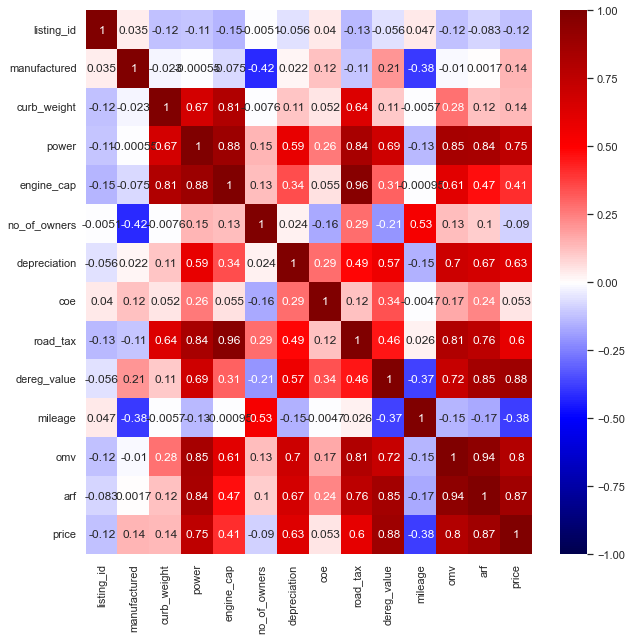

In [17]:
df_col_num = df[col_num]
f, axs = plt.subplots(1, 1, figsize=(10, 10))
sns.heatmap(df_col_num.corr(), cmap='seismic', vmin=-1, vmax=1, annot=True)


#### 2.2.3 To show all the collinearity >0.8
Create functions to rank top collinearities, ref: https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas.

We can see that: collinearity: R2>0.9
- `omv`~`arf`: 0.938438
- `road_tax`~`engine_cap`: 0.966132


In [18]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[(au_corr>0.8)]


In [19]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(df_col_num ))

Top Absolute Correlations
engine_cap   road_tax      0.964834
omv          arf           0.938835
power        engine_cap    0.883397
dereg_value  price         0.880036
arf          price         0.872913
dereg_value  arf           0.854989
power        omv           0.848051
             road_tax      0.842791
             arf           0.838346
road_tax     omv           0.810891
curb_weight  engine_cap    0.805207
dtype: float64


## 3. Feature Selection

### 3.1 Selection

**Features to keep:**

numerical columns:
- `manufactured`
- `curb_weight`
- `power`
- `engine_cap` 
- `no_of_owners`
- `depreciation` 
- `coe`
- `dereg_value`
- `mileage`
- `omv`
- `reg_date_processed` (to be created)

categorical columns:
- `type_of_vehicle`
- `transmission`
- `manufacturer`(to be created)


**Feathures to drop:**
- `omv` &`arf`: as a new feature `ARF_calculated` is created
- `road_tax`: as collinear with `engine_cap`
- `model`: categorical feature contains 692 unique values that not helpful for regression 
- `title`: categorical feature contains 5775 unique values that not helpful for regression
- `make`: new feature `manufacturer`will be created to replace `make`
- `description`: drop as too much content that requires further processing. 
- `original_reg_date`: drop as new feature `reg_date_processed` is created
- `reg_date`: drop as new feature `reg_date_processed` is created
- `category`: drop as too much content that requires further processing.
- `fuel_type`: 79% are null
- `opc_scheme`: 99% are null
- `lifespan`: 90% are null
- `eco_category`: only 1 unique value, not meaningful
- `features`: drop as too much content that requires further processing.
- `accessories`: drop as too much content that requires further processing.
- `indicative_price`: 100% are null

from task 1, we can see that `original_reg_date`, `fuel_type`, `opc_scheme`, `lifespan`, `indicative_price` are with high percentage of empty entry

In [20]:
class FeatureCreator(BaseEstimator,TransformerMixin):
    def __init__(self):
        return
        
    def fit(self, X, y=None, **fit_params):
        return self
        
    def transform(self, X, y=None, **fit_params):
        self.X = X.copy()

        self.X['reg_date_processed'] = np.where(self.X['reg_date'].isnull(), self.X['original_reg_date'],self.X['reg_date'] )            
        
        self.X['reg_date_processed'] = pd.to_datetime("4-Oct-2021").date() - pd.to_datetime(self.X['reg_date_processed']).dt.date
        self.X['reg_date_processed'] = self.X['reg_date_processed'].dt.days/365
        
        conditions = [
            self.X['omv'] <= 20000,
            (self.X['omv'] > 20000) & (self.X['omv'] <=50000),
            self.X['omv'] > 50000
        ]

        values = [
            self.X['omv'],
            ((self.X['omv']-20000)*1.4+20000),
            ((self.X['omv']-50000)*1.8+62000)
        ]

        self.X['ARF_calculated'] = np.select(conditions, values, default=0)
        
        self.X['ARF_calculated'] = np.where(self.X['arf'].isnull(), self.X['ARF_calculated'],self.X['arf'] ) 
        
        self.X['manufacturer'] = self.X['title'].str.split().str[0]
    
        return self.X 

In [21]:
###test
fc = FeatureCreator()
df_proced = fc.fit_transform(df)
df_proced.head()

,listing_id,title,make,model,description,manufactured,original_reg_date,reg_date,type_of_vehicle,category,...,opc_scheme,lifespan,eco_category,features,accessories,indicative_price,price,reg_date_processed,ARF_calculated,manufacturer
0,1030324,BMW 3 Series 320i Gran Turismo M-Sport,bmw,320i,1 owner! 320i gt m-sports model! big brake kit...,2013.0,NaN,09-dec-2013,luxury sedan,"parf car, premium ad car, low mileage car",...,NaN,NaN,uncategorized,"5 doors gt, powerful and fuel efficient 2.0l t...","bmw i-drive, navigation, bluetooth/aux/usb inp...",NaN,71300.0,7.824658,50462.0,BMW
1,1021510,Toyota Hiace 3.0M,NaN,hiace,high loan available! low mileage unit. wear an...,2014.0,NaN,26-jan-2015,van,premium ad car,...,NaN,25-jan-2035,uncategorized,low mileage unit. well maintained vehicle. vie...,factory radio setting. front recording camera....,NaN,43800.0,6.693151,1376.0,Toyota
2,1026909,Mercedes-Benz CLA-Class CLA180,mercedes-benz,cla180,1 owner c&c unit. full agent service with 1 mo...,2016.0,NaN,25-jul-2016,luxury sedan,"parf car, premium ad car",...,NaN,NaN,uncategorized,responsive and fuel efficient 1.6l inline 4 cy...,dual electric/memory seats. factory fitted aud...,NaN,95500.0,5.197260,26041.0,Mercedes-Benz
3,1019371,Mercedes-Benz E-Class E180 Avantgarde,mercedes-benz,e180,"fully agent maintained, 3 years warranty 10 ye...",2019.0,NaN,17-nov-2020,luxury sedan,"parf car, almost new car, consignment car",...,NaN,NaN,uncategorized,"1.5l inline-4 twin scroll turbocharged engine,...",64 colour ambient lighting. active parking ass...,NaN,197900.0,0.879452,56977.0,Mercedes-Benz
4,1031014,Honda Civic 1.6A VTi,NaN,civic,"kah motor unit! 1 owner, lowest 1.98% for full...",2019.0,NaN,20-sep-2019,mid-sized sedan,parf car,...,NaN,NaN,uncategorized,"1.6l i-vtec engine, 123 bhp, earth dreams cvt ...","s/rims, premium leather seats, factory touch s...",NaN,103200.0,2.041096,20101.0,Honda


### 3.2 Create imputor and encoders

In [22]:
#create imputers
num_imp = SimpleImputer(strategy='mean')
cat_imp = SimpleImputer(strategy="most_frequent")

In [23]:
#create transformers
cat_enc = OneHotEncoder(handle_unknown='ignore')

#create encoders
num_encoder = num_imp
cat_encoder = Pipeline(steps=[('cat_imp', cat_imp), ('cat_enc', cat_enc)])


In [24]:
from sklearn import compose

num_cols = ['manufactured', 'curb_weight', 'power', 'engine_cap', 'no_of_owners','omv',
             'coe','dereg_value', 'mileage','reg_date_processed','ARF_calculated','depreciation']
#cat_cols = [ 'type_of_vehicle', 'transmission', 'manufacturer']

coltfr = compose.ColumnTransformer(
                transformers=[
                  ('num', num_encoder, num_cols),
#                  ('cat', cat_encoder, cat_cols),
                ], remainder ='drop')
                
preprocessor = Pipeline(steps=[
    ('featcreate', FeatureCreator()),
    ('colproc', coltfr)
])

In [25]:
df_num_proced = pd.DataFrame(preprocessor.fit_transform(df))

In [26]:
df_num_proced.columns = num_cols
df_num_proced

,manufactured,curb_weight,power,engine_cap,no_of_owners,omv,coe,dereg_value,mileage,reg_date_processed,ARF_calculated,depreciation
0,2013.0,1560.0,135.000000,1997.0,1.0,45330.0,77100.0,47514.0,73000.0,7.824658,50462.0,17700.0
1,2014.0,1740.0,133.787104,2982.0,3.0,27502.0,10660.0,3648.0,110112.0,6.693151,1376.0,11630.0
2,2016.0,1430.0,90.000000,1595.0,1.0,27886.0,53694.0,44517.0,80000.0,5.197260,26041.0,15070.0
3,2019.0,1635.0,115.000000,1497.0,1.0,46412.0,40690.0,80301.0,9800.0,0.879452,56977.0,16400.0
4,2019.0,1237.0,92.000000,1597.0,1.0,20072.0,26667.0,36453.0,40000.0,2.041096,20101.0,10450.0
...,...,...,...,...,...,...,...,...,...,...,...,...
21779,2017.0,1449.0,84.000000,1600.0,2.0,13452.0,36001.0,32035.0,88000.0,4.016438,13452.0,9640.0
21780,2019.0,1775.0,125.000000,2362.0,1.0,34487.0,41001.0,62123.0,15000.0,1.928767,40282.0,15860.0
21781,2013.0,1405.0,100.000000,1598.0,1.0,35847.0,72369.0,36502.0,65000.0,7.717808,32186.0,14610.0
21782,2016.0,1190.0,96.000000,1496.0,1.0,23650.0,53334.0,42129.0,45188.0,5.041096,20110.0,11390.0


In [27]:
df_num_proced['filter'] = df_num_proced.omv.copy()

In [28]:
f1 = df_num_proced[df_num_proced['filter']<=20000]
f2 = df_num_proced[df_num_proced['filter'].between(20000,50000)]
f3 = df_num_proced[df_num_proced['filter']>=50000]

In [29]:
f1.shape

(6432, 13)

In [30]:
f2.shape

(11630, 13)

In [31]:
f3.shape

(3743, 13)

## 4. regression model


### 4.1 category f1

In [32]:
f1 = f1.drop('filter', axis=1)
f1.shape

(6432, 12)

In [33]:
f1.head()

,manufactured,curb_weight,power,engine_cap,no_of_owners,omv,coe,dereg_value,mileage,reg_date_processed,ARF_calculated,depreciation
8,2011.0,1195.0,90.0,1598.0,2.0,15263.0,42283.0,40951.0,72712.078801,10.230137,15263.0,6280.0
10,2017.0,1295.0,95.3,1591.0,1.0,12900.0,42801.0,35227.0,72712.078801,4.142466,12900.0,8270.0
12,2019.0,1345.0,93.8,1591.0,1.0,18272.0,33009.0,41097.0,27000.000000,1.816438,18272.0,8390.0
25,2017.0,1130.0,97.0,1496.0,1.0,18656.0,39903.0,33126.0,59900.000000,3.432877,8656.0,10100.0
26,2008.0,1200.0,81.0,1496.0,5.0,19083.0,16438.0,12304.0,115000.000000,11.323288,19083.0,8760.0


### 4.1.1find best model

Split train data and validation data

on 80% train, 20% validation basis

In [34]:
X1 = f1.drop('depreciation', axis=1)
y1 = f1['depreciation']

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X1,y1,test_size=0.3,random_state=13)

In [36]:
from sklearn.feature_selection import f_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [37]:
scaler = StandardScaler(with_mean=False)

est1 = Pipeline(steps=[('scaler',scaler),
                       ('regression', DecisionTreeRegressor(random_state = 0))])

est2 = Pipeline(steps=[('scaler',scaler),
                       ('regression', KNeighborsRegressor(n_neighbors=3))])

est3 = Pipeline(steps=[('scaler',scaler),
                       ('regression', RandomForestRegressor(random_state =0, 
                                                            n_estimators =20))])

est4 = Pipeline(steps=[('scaler',scaler),
                       ('regression', AdaBoostRegressor(random_state =0 ))])

est5 = Pipeline(steps=[('scaler',scaler),
                       ('regression', GradientBoostingRegressor(random_state =0))])

In [38]:
i=0
for est in [est1, est2, est3, est4, est5]:

    # Perform 10-fold cross_validations
    scores = cross_validate(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
    RMSE_train = scores['train_score'] * (-1)
    RMSE_valid = scores['test_score'] * (-1)
    
    i+=1
    print('est {}, RMSE training = {:6.0f} ({:6.0f}), RMSE validation = {:6.0f} ({:6.0f})'
          .format(i, np.mean(RMSE_train), np.std(RMSE_train), np.mean(RMSE_valid), np.std(RMSE_valid)))

est 1, RMSE training =      5 (     3), RMSE validation =   3900 (  2071)
est 2, RMSE training =   1998 (   625), RMSE validation =   2629 (  1640)
est 3, RMSE training =   1158 (   427), RMSE validation =   2585 (  1665)
est 4, RMSE training =   1678 (   133), RMSE validation =   3322 (  1969)
est 5, RMSE training =    879 (    26), RMSE validation =   2606 (  1737)


from the result, we can find that the est3 has lowest RMSE, so we decided to choose est3:randomforest as the best model.

### 4.1.2 feature importance

Feature: 0, Score: 0.03317 manufactured
Feature: 1, Score: 0.05988 curb_weight
Feature: 2, Score: 0.11579 power
Feature: 3, Score: 0.21928 engine_cap
Feature: 4, Score: 0.00737 no_of_owners
Feature: 5, Score: 0.04770 omv
Feature: 6, Score: 0.21904 coe
Feature: 7, Score: 0.13222 dereg_value
Feature: 8, Score: 0.01827 mileage
Feature: 9, Score: 0.10303 reg_date_processed
Feature: 10, Score: 0.04424 ARF_calculated


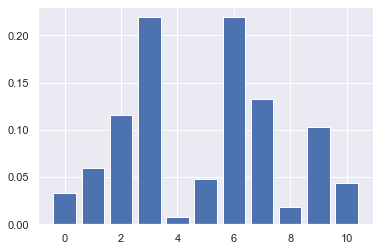

In [39]:
model1 = RandomForestRegressor()
model1.fit(X1, y1)
# get importance
importance = model1.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),X1.columns[i])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The three most important factors influencing omv prices below 20,000 used cars in order of importance are:`engine_cap`,`coe`,`dereg_value`.

### 4.2 category f2

In [40]:
f2 = f2.drop('filter', axis=1)
f2.shape
X2 = f2.drop('depreciation', axis=1)
y2 = f2['depreciation']

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X2,y2,test_size=0.3,random_state=13)

### 4.2.1find best model

In [42]:
i=0
for est in [est1, est2, est3, est4, est5]:

    # Perform 10-fold cross_validations
    scores = cross_validate(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
    RMSE_train = scores['train_score'] * (-1)
    RMSE_valid = scores['test_score'] * (-1)
    
    i+=1
    print('est {}, RMSE training = {:6.0f} ({:6.0f}), RMSE validation = {:6.0f} ({:6.0f})'
          .format(i, np.mean(RMSE_train), np.std(RMSE_train), np.mean(RMSE_valid), np.std(RMSE_valid)))

est 1, RMSE training =      9 (     3), RMSE validation =   4058 (   710)
est 2, RMSE training =   2403 (   232), RMSE validation =   3367 (   713)
est 3, RMSE training =   1261 (   108), RMSE validation =   3004 (   883)
est 4, RMSE training =   7254 (  2306), RMSE validation =   7862 (  1799)
est 5, RMSE training =   1977 (    64), RMSE validation =   3388 (   786)


we choose the est 3: random forest as the best model.

### 4.2.2 feature importance

we choose est 5 as the best model for f2

Feature: 0, Score: 0.04995 manufactured
Feature: 1, Score: 0.04419 curb_weight
Feature: 2, Score: 0.06583 power
Feature: 3, Score: 0.04549 engine_cap
Feature: 4, Score: 0.01097 no_of_owners
Feature: 5, Score: 0.06274 omv
Feature: 6, Score: 0.13014 coe
Feature: 7, Score: 0.22906 dereg_value
Feature: 8, Score: 0.04339 mileage
Feature: 9, Score: 0.14784 reg_date_processed
Feature: 10, Score: 0.17040 ARF_calculated


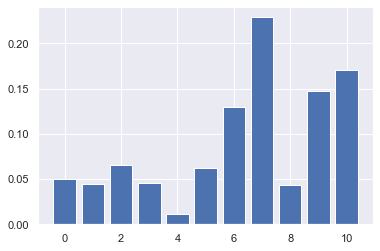

In [43]:
model2 = RandomForestRegressor()
model2.fit(X2, y2)
# get importance
importance = model2.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),X2.columns[i])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The three most important factors influencing omv prices between 20,0000 and 500000 used cars in order of importance are:`dereg_value`,`ARF_calculated`,`reg_date_processed`.

### 4.3 category f3

In [44]:
f3 = f3.drop('filter', axis=1)
f3.shape
X3 = f3.drop('depreciation', axis=1)
y3 = f3['depreciation']

In [45]:
X_train,X_test,y_train,y_test = train_test_split(X3,y3,test_size=0.3,random_state=13)

### 4.3.1find best model

In [46]:
i=0
for est in [est1, est2, est3, est4, est5]:

    # Perform 10-fold cross_validations
    scores = cross_validate(est, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error', return_train_score=True)
    RMSE_train = scores['train_score'] * (-1)
    RMSE_valid = scores['test_score'] * (-1)
    
    i+=1
    print('est {}, RMSE training = {:6.0f} ({:6.0f}), RMSE validation = {:6.0f} ({:6.0f})'
          .format(i, np.mean(RMSE_train), np.std(RMSE_train), np.mean(RMSE_valid), np.std(RMSE_valid)))

est 1, RMSE training =     54 (    44), RMSE validation =  29160 (  9847)
est 2, RMSE training =  20310 (  1748), RMSE validation =  27325 (  7710)
est 3, RMSE training =  11592 (  1381), RMSE validation =  23641 (  9385)
est 4, RMSE training =  23659 (   951), RMSE validation =  33807 (  8449)
est 5, RMSE training =   8150 (   449), RMSE validation =  21894 (  7424)


we choose the est 5: gradient boost as the best model.

### 4.3.2 feature importance

Feature: 0, Score: 0.01253 manufactured
Feature: 1, Score: 0.03447 curb_weight
Feature: 2, Score: 0.02649 power
Feature: 3, Score: 0.00223 engine_cap
Feature: 4, Score: 0.01697 no_of_owners
Feature: 5, Score: 0.27700 omv
Feature: 6, Score: 0.26046 coe
Feature: 7, Score: 0.08773 dereg_value
Feature: 8, Score: 0.00555 mileage
Feature: 9, Score: 0.15419 reg_date_processed
Feature: 10, Score: 0.12238 ARF_calculated


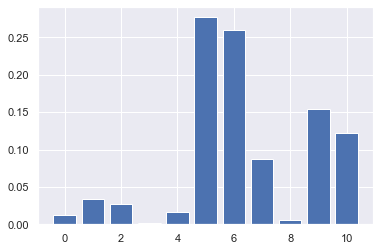

In [47]:
model3 = GradientBoostingRegressor()
model3.fit(X3, y3)
# get importance
importance = model3.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v),X3.columns[i])
plt.bar([x for x in range(len(importance))], importance)
plt.show()

The three most important factors influencing omv prices over 500000 used cars in order of importance are:`coe`,`omv`,`reg_date_processed`.